In [1]:
# usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# NLP -specific imports

# CountVectorizer => the most simple vectorizing tool for text data 
from sklearn.feature_extraction.text import CountVectorizer

# import the multinomial Naive-Bayes (supports more than 2 outcomes too!)
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('cleaned_reviews.csv')

In [3]:
df

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0
...,...,...,...,...
17335,positive,i love this speaker and love can take it anywh...,30,5.0
17336,positive,i use it in my house easy to connect and loud ...,13,4.0
17337,positive,the bass is good and the battery is amazing mu...,41,5.0
17338,positive,love it,2,5.0


In [5]:
df['sentiments'].value_counts()



sentiments
positive    9503
neutral     6303
negative    1534
Name: count, dtype: int64

In [6]:
df['review_score'].value_counts()


review_score
5.0    9316
1.0    3898
4.0    1714
2.0    1295
3.0    1117
Name: count, dtype: int64

In [8]:
df.columns 

Index(['sentiments', 'cleaned_review', 'cleaned_review_length',
       'review_score'],
      dtype='object')

In [10]:
df = df.dropna(subset=['cleaned_review'])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiments']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

              precision    recall  f1-score   support

    negative       0.64      0.24      0.35       315
     neutral       0.67      0.60      0.63      1248
    positive       0.77      0.90      0.83      1905

    accuracy                           0.73      3468
   macro avg       0.69      0.58      0.60      3468
weighted avg       0.72      0.73      0.71      3468



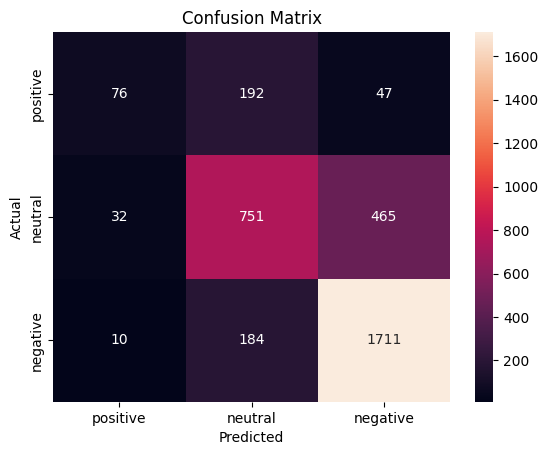

In [13]:
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
labels = ["positive", "neutral", "negative"]

sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
sample_reviews = [
    "This product is amazing, I love it!",
    "It's okay, nothing special.",
    "Terrible quality, I want a refund!"
]

# Векторизация
sample_vectorized = vectorizer.transform(sample_reviews)

# Предсказание вероятностей
results = model.predict_proba(sample_vectorized)

for i in range(len(sample_reviews)):
    print("\n", sample_reviews[i])
    print("Predicted:", model.predict(sample_vectorized)[i])
    print("Probabilities:", results[i])



 This product is amazing, I love it!
Predicted: positive
Probabilities: [4.68295254e-04 6.60955558e-03 9.92922149e-01]

 It's okay, nothing special.
Predicted: neutral
Probabilities: [0.28195567 0.51647575 0.20156858]

 Terrible quality, I want a refund!
Predicted: neutral
Probabilities: [0.15967414 0.67920164 0.16112421]
